This notebook shows ion temperature diagnostics using the synthetic line widths from the AWSoM-R simulation. 
Link to [Figure 13](#figure13). 

(The internal hyperlink only works on [nbviewer](https://nbviewer.org/github/yjzhu-solar/EIS_SUMER_PCH_Ti/blob/main/ipynb/paper/temp_diag_pseudo.ipynb). Do not click when viewing the notebook on GitHub.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import transforms
import astropy.constants as const
import pandas as pd
import cmcrameri.cm as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 


In [2]:
df = pd.read_excel("../../save/awsom_ion_width_merg.xlsx")
df["ion"] = df["ion"].str.strip()
df["charge"] = df["charge"].str.strip()
df["inst"] = df["inst"].str.strip()
df["quality"] = df["quality"].str.strip()
df

,ion,charge,Z,A,temp,inst,veff,veff_err,quality,desc
0,Fe,viii,7,55.85000,5.8,EIS,38.8,0.1,a,NaN
1,Fe,ix,8,55.85000,5.8,EIS,38.7,0.3,a,NaN
2,Fe,x,9,55.85000,5.9,EIS,39.7,0.1,a,NaN
3,Fe,xi,10,55.85000,6.0,EIS,40.9,0.0,a,NaN
4,Fe,xii,11,55.85000,6.1,EIS,43.5,0.3,a,NaN
5,Fe,xiii,12,55.85000,6.1,EIS,44.9,0.6,a,NaN
6,O,vi,5,15.99940,5.6,EIS,48.2,0.1,a,NaN
7,Mg,vi,5,24.30500,5.7,EIS,42.9,0.0,b,NaN
8,Mg,vii,6,24.30500,5.8,EIS,43.1,0.0,a,NaN
9,Si,vii,6,28.08550,5.8,EIS,42.3,0.0,a,NaN


In [3]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [4]:
line_name = df["ion"] + r" \textsc{"+ df["charge"] + r"}"
veff = df["veff"]*1.e5
veff_err = df["veff_err"]*1.e5
vnt_max = np.min(veff)
veff_res = np.sqrt(np.square(veff)-np.square(vnt_max)) + 1.
veff_res_err = np.sqrt(np.square(veff-veff_err)-np.square(vnt_max))
veff_res_err = np.nan_to_num(veff_res_err,nan=1.)
T_max = np.square(veff)*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_min = np.square(veff_res)*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_err = 2*veff*veff_err*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_min_err = veff*veff_err/veff_res*df["A"]*amu/2/k_B/(4*np.log(2))*4*np.log(2)
T_max_lim = T_max + T_err
T_min_lim = T_min - T_err
T_min_lim[T_min_lim <=0] = 1


/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df["T_max"] = T_max
df["T_min"] = T_min
df["T_err"] = T_err
df["T_max_lim"] = T_max_lim
df["T_min_lim"] = T_min_lim
df["Z2A"] = df["Z"]/df["A"]
df["label"] = df["ion"] + r" \textsc{"+ df["charge"] + r"}"

In [6]:
df

,ion,charge,Z,A,temp,inst,veff,veff_err,quality,desc,T_max,T_min,T_err,T_max_lim,T_min_lim,Z2A,label
0,Fe,viii,7,55.85000,5.8,EIS,38.8,0.1,a,NaN,5.056179e+06,7.788639e+04,26062.778784,5.082242e+06,5.182361e+04,0.125336,Fe \textsc{viii}
1,Fe,ix,8,55.85000,5.8,EIS,38.7,0.3,a,NaN,5.030150e+06,5.185713e+04,77986.820021,5.108137e+06,1.000000e+00,0.143241,Fe \textsc{ix}
2,Fe,x,9,55.85000,5.9,EIS,39.7,0.1,a,NaN,5.293465e+06,3.151722e+05,26667.327776,5.320132e+06,2.885049e+05,0.161146,Fe \textsc{x}
3,Fe,xi,10,55.85000,6.0,EIS,40.9,0.0,a,NaN,5.618309e+06,6.400168e+05,0.000000,5.618309e+06,6.400168e+05,0.179051,Fe \textsc{xi}
4,Fe,xii,11,55.85000,6.1,EIS,43.5,0.3,a,NaN,6.355321e+06,1.377030e+06,87659.603900,6.442981e+06,1.289370e+06,0.196956,Fe \textsc{xii}
5,Fe,xiii,12,55.85000,6.1,EIS,44.9,0.6,a,NaN,6.770982e+06,1.792691e+06,180961.665062,6.951944e+06,1.611729e+06,0.214861,Fe \textsc{xiii}
6,O,vi,5,15.99940,5.6,EIS,48.2,0.1,a,NaN,2.235289e+06,8.091530e+05,9275.056190,2.244564e+06,7.998779e+05,0.312512,O \textsc{vi}
7,Mg,vi,5,24.30500,5.7,EIS,42.9,0.0,b,NaN,2.689961e+06,5.234907e+05,0.000000,2.689961e+06,5.234907e+05,0.205719,Mg \textsc{vi}
8,Mg,vii,6,24.30500,5.8,EIS,43.1,0.0,a,NaN,2.715101e+06,5.486304e+05,0.000000,2.715101e+06,5.486304e+05,0.246863,Mg \textsc{vii}
9,Si,vii,6,28.08550,5.8,EIS,42.3,0.0,a,NaN,3.022030e+06,5.185772e+05,0.000000,3.022030e+06,5.185772e+05,0.213633,Si \textsc{vii}


In [7]:
df_sumer = df.loc[df["inst"] == "SUMER"]
df_eis = df.loc[df["inst"] == "EIS"]
stats_sumer = []
pos_sumer = []
stats_eis = []
pos_eis = []

for ii, row in df_sumer.iterrows():
    label = dict(
        q1=row["T_min"],
        q3=row["T_max"],
        whislo=row["T_min_lim"],
        whishi=row["T_max_lim"],
        mean=0,iqr=0,cilo=0,cihi=0,fliers=np.array([]),med=0
    )
    stats_sumer.append(label)
    pos_sumer.append(row["Z2A"])

for ii, row in df_eis.iterrows():
    label = dict(
        q1=row["T_min"],
        q3=row["T_max"],
        whislo=row["T_min_lim"],
        whishi=row["T_max_lim"],
        mean=0,iqr=0,cilo=0,cihi=0,fliers=np.array([]),med=0
    )
    stats_eis.append(label)
    pos_eis.append(row["Z2A"])

In [8]:
def rainbow_text(ax,x,y,ls,lc,**kw):
    """
    Take a list of strings ``ls`` and colors ``lc`` and place them next to each
    other, with text ls[i] being shown in color lc[i].

    This example shows how to do both vertical and horizontal text, and will
    pass all keyword arguments to plt.text, so you can set the font size,
    family, etc.
    """
    t = plt.gca().transData

    #horizontal version
    for s,c in zip(ls,lc):
        text = ax.text(x,y,s,color=c, transform=t, **kw)
        text.draw(fig.canvas.get_renderer())
        ex = text.get_window_extent()
        t = transforms.offset_copy(text._transform, x=ex.width, units='dots')

    #vertical version
    # for s,c in zip(ls,lc):
    #     text = ax.text(x,y,s+" ",color=c, transform=t,
    #             rotation=90,va='bottom',ha='center',**kw)
    #     text.draw(fig.canvas.get_renderer())
    #     ex = text.get_window_extent()
    #     t = transforms.offset_copy(text._transform, y=ex.height, units='dots')

In [12]:
df_ion = df[["ion","charge","Z2A"]]
df_ion = df_ion.drop_duplicates().sort_values("Z2A").reset_index(drop=True)
df_ion

,ion,charge,Z2A
0,Fe,viii,0.125336
1,Mn,viii,0.127416
2,Fe,ix,0.143241
3,Fe,x,0.161146
4,Ar,viii,0.175228
5,Fe,xi,0.179051
6,Fe,xii,0.196956
7,Mg,vi,0.205719
8,Si,vii,0.213633
9,Fe,xiii,0.214861


### Figure 13
<a id='figure13'></a>

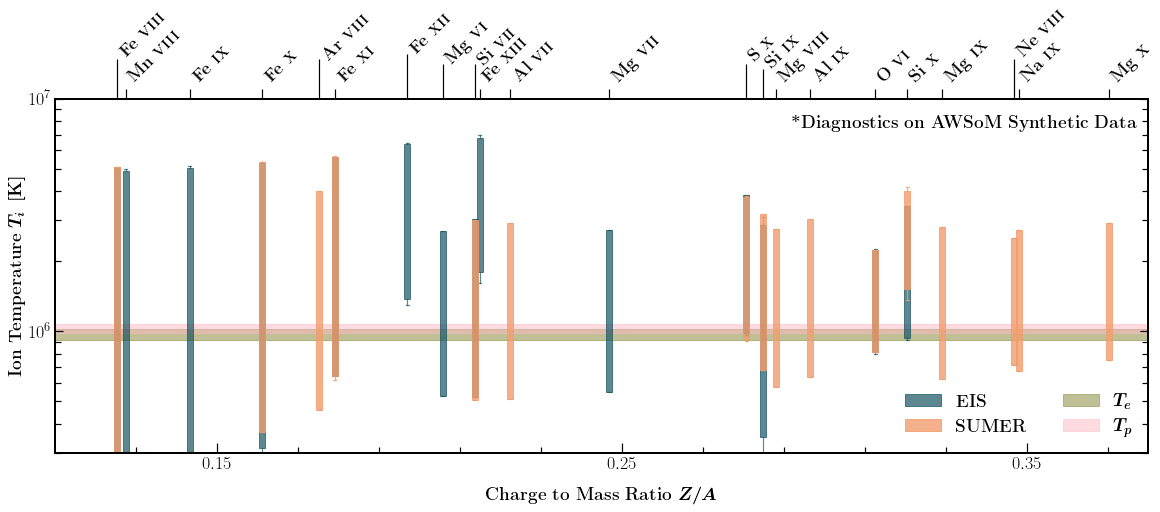

In [25]:
color_sumer = cmcm.batlow(0.75)
color_eis = cmcm.batlow(0.2)
fig, ax = plt.subplots(figsize=(16,7),constrained_layout=True)
eis_boxprops = dict(edgecolor=color_eis,facecolor=color_eis,alpha=0.7)
eis_capprops = dict(color=color_eis,alpha=0.7,linewidth=1.2)
eis_whiskerprops = dict(color=color_eis,alpha=0.7,linewidth=1.2)

sumer_boxprops = dict(edgecolor=color_sumer,facecolor=color_sumer,alpha=0.8)
sumer_capprops = dict(color=color_sumer,alpha=0.8,linewidth=1.2)
sumer_whiskerprops = dict(color=color_sumer,alpha=0.8,linewidth=1.2)

medianprops= dict(linewidth=0)

eis_bp = ax.bxp(stats_eis,showmeans=False,boxprops=eis_boxprops,capprops=eis_capprops,
        whiskerprops=eis_whiskerprops,medianprops=medianprops,widths=0.0015,patch_artist=True,
        positions=pos_eis,manage_ticks=False)

sumer_bp = ax.bxp(stats_sumer,showmeans=False,boxprops=sumer_boxprops,capprops=sumer_capprops,
        whiskerprops=sumer_whiskerprops,medianprops=medianprops,widths=0.0015,patch_artist=True,
        positions=pos_sumer,manage_ticks=False)

ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge"] + r"}}"



te_hspan = ax.axhspan(1.1e6*0.83,1.23e6*0.83,color=cmcm.batlow(0.5),alpha=0.5,zorder=0)
tp_hspan = ax.axhspan(9.77e+05,1.07e+06,color=cmcm.batlow(0.9),alpha=0.5,zorder=0)
ax.legend([eis_bp["boxes"][0],sumer_bp["boxes"][0],te_hspan,tp_hspan],
        [r"\textbf{EIS}",r"\textbf{SUMER}",r"$\boldsymbol{T_e}$",r"$\boldsymbol{T_p}$"],
        loc="lower right",fontsize=18,frameon=False,ncol=2)

ax.set_yscale("log")
ax.set_ylim(3e5,1e7)
ax.set_xlim(0.11,0.38)
ax.set_xticks([0.15,0.25,0.35])
ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=True)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylabel(r"\textbf{Ion Temperature} $\boldsymbol{T_i\ \left[\mathrm{K}\right]}$",fontsize=18)
ax.set_xlabel(r"\textbf{Charge to Mass Ratio} $\boldsymbol{Z/A}$",fontsize=18,labelpad=15)
ax.text(0.99,0.93,r"\textbf{*Diagnostics on AWSoM Synthetic Data}",transform=ax.transAxes,
        ha="right",va="center",color="black",fontsize=18)

ax_ion = ax.twiny()
ax_ion.set_xlim(ax.get_xlim())
ax_ion.set_xticks(df_ion["Z2A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=18)

tick_len_index = [1,9,13,15,17,25,27,39]
tick_len = [40,40,45,35,35,35,30,40]
label_index = [0,4,6,7,8,12,13,19]
label_pos = [1.07,1.06,1.08,1.05,1.05,1.06,1.04,1.07]
ax_ion_major_ticks = ax_ion.get_xticklines()
ax_ion_major_labels = ax_ion.get_xmajorticklabels()
for tick_len_index_, tick_len_, label_index_, label_pos_ in zip(tick_len_index, tick_len, label_index, label_pos):
    ax_ion_major_ticks[tick_len_index_].set_markersize(tick_len_)
    ax_ion_major_labels[label_index_].set_y(label_pos_)
#ax.grid("on",which="both")
#plt.savefig(fname="../../figs/ms/temp_diag_awsom.pdf",format="pdf")